C:\Users\ghkjs\anaconda3\envs\econ_pred\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ghkjs\anaconda3\envs\econ_pred\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Plot saved to ../output/ridge_lasso_regression\feature_coefficient.png


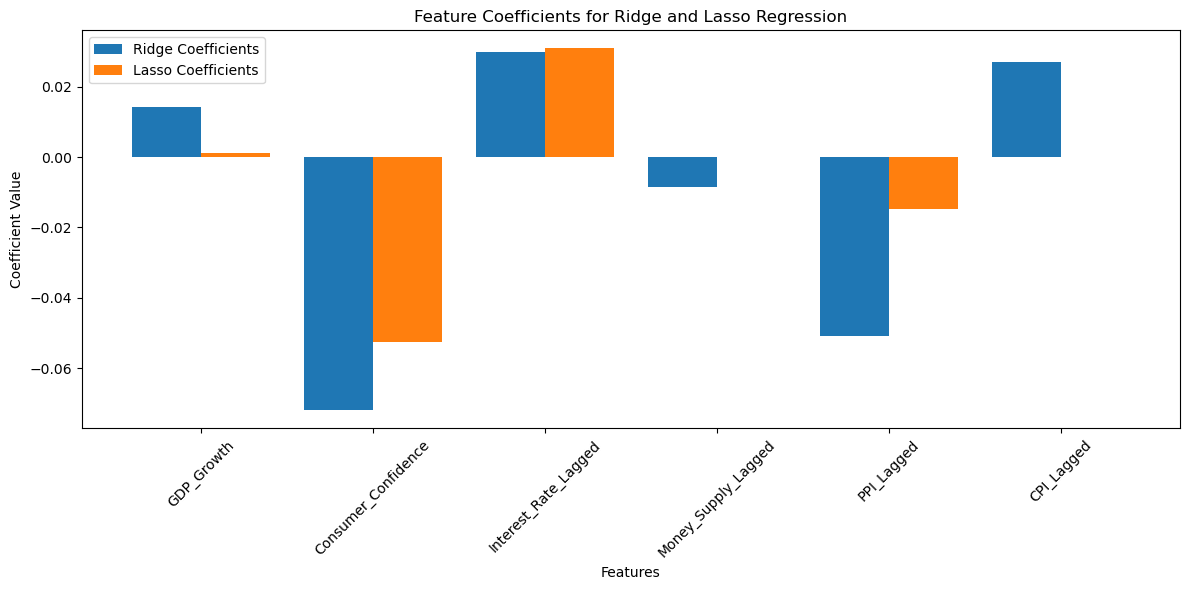

Plot saved to ../output/ridge_lasso_regression\actual_v_predicted.png


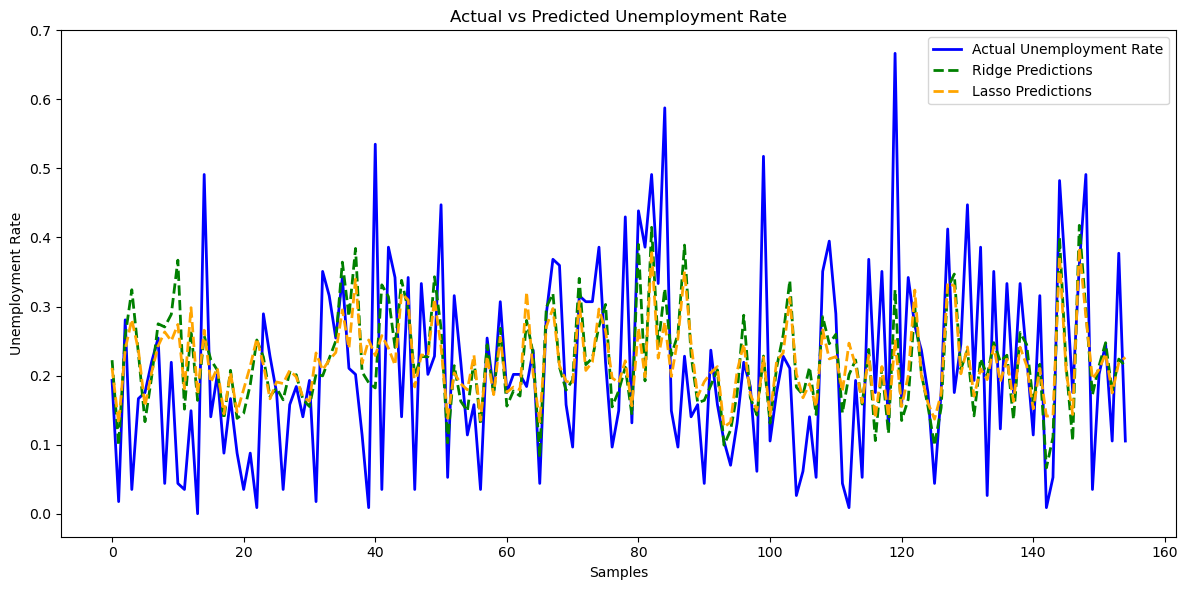

In [6]:
import pandas as pd
import os

# Load the uploaded dataset to inspect its contents
file_path = '../data/lagged_dataset/lagged_dataset_merged.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Extract predictors and target variable
predictors = [
    'GDP_Growth', 'Consumer_Confidence', 'Interest_Rate_Lagged', 
    'Money_Supply_Lagged', 'PPI_Lagged', 'CPI_Lagged'
]
target = 'Unemployment_Rate'

X = data[predictors]
y = data[target]

# Check for missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Handle missing values if present
if not missing_values.empty:
    X = X.fillna(X.mean())
    y = y.fillna(y.mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the predictors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5], y_train[:5]

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define hyperparameters for tuning
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Ridge Regression
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_scaled, y_train)

# Lasso Regression
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train_scaled, y_train)

# Best parameters
ridge_best_alpha = ridge_cv.best_params_['alpha']
lasso_best_alpha = lasso_cv.best_params_['alpha']

# Train models with the best alpha
ridge_best = Ridge(alpha=ridge_best_alpha).fit(X_train_scaled, y_train)
lasso_best = Lasso(alpha=lasso_best_alpha).fit(X_train_scaled, y_train)

# Predictions
ridge_preds = ridge_best.predict(X_test_scaled)
lasso_preds = lasso_best.predict(X_test_scaled)

# Evaluation
ridge_rmse = mean_squared_error(y_test, ridge_preds, squared=False)
lasso_rmse = mean_squared_error(y_test, lasso_preds, squared=False)
ridge_mae = mean_absolute_error(y_test, ridge_preds)
lasso_mae = mean_absolute_error(y_test, lasso_preds)

ridge_results = {'Best Alpha': ridge_best_alpha, 'RMSE': ridge_rmse, 'MAE': ridge_mae}
lasso_results = {'Best Alpha': lasso_best_alpha, 'RMSE': lasso_rmse, 'MAE': lasso_mae}

ridge_results, lasso_results

import matplotlib.pyplot as plt
import numpy as np

# Retrieve feature coefficients
ridge_coefficients = ridge_best.coef_
lasso_coefficients = lasso_best.coef_

# Feature names
features = predictors

# Visualizing the coefficients
plt.figure(figsize=(12, 6))

# Ridge coefficients
plt.bar(np.arange(len(features)) - 0.2, ridge_coefficients, width=0.4, label='Ridge Coefficients')

# Lasso coefficients
plt.bar(np.arange(len(features)) + 0.2, lasso_coefficients, width=0.4, label='Lasso Coefficients')

# Adding labels and legend
plt.xticks(np.arange(len(features)), features, rotation=45)
plt.title('Feature Coefficients for Ridge and Lasso Regression')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.legend()
plt.tight_layout()
png_out_dir='../output/ridge_lasso_regression'
png_file_path = os.path.join(png_out_dir, 'feature_coefficient.png')
plt.savefig(png_file_path)
print(f"Plot saved to {png_file_path}")
plt.show()

# Visualize predictions vs actuals
plt.figure(figsize=(12, 6))

# Ridge predictions
plt.plot(y_test.values, label='Actual Unemployment Rate', color='blue', linewidth=2)
plt.plot(ridge_preds, label='Ridge Predictions', linestyle='--', color='green', linewidth=2)

# Lasso predictions
plt.plot(lasso_preds, label='Lasso Predictions', linestyle='--', color='orange', linewidth=2)

plt.title('Actual vs Predicted Unemployment Rate')
plt.xlabel('Samples')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.tight_layout()
png_out_dir='../output/ridge_lasso_regression'
png_file_path = os.path.join(png_out_dir, 'actual_v_predicted.png')
plt.savefig(png_file_path)
print(f"Plot saved to {png_file_path}")
plt.show()
